### Analisis Deskriptif dan Exploratory Data Analysis

# **Mengidentifikasi Hubungan Pola Hidup, Tekanan Akademik, dan Depresi di Kalangan Mahasiswa**


**Oleh:** <br>
Benony Gabriel <br>
NIM: 105222002

**Sumber Data:** <br>
Dataset yang digunakan dalam *Exploratory Data Analysis (EDA)*  ini diambil dari Kaggle dengan judul *Depression Student Dataset*. Dataset ini tersedia di tautan berikut: <a href="https://www.kaggle.com/datasets/ikynahidwin/depression-student-dataset">Kaggle - Depression Student Dataset.</a>

**Deskripsi Dataset** <br>
Dataset ini terdiri dari **502 baris** dan **11 kolom**, dengan detail sebagai berikut:
1)	**Gender**: Jenis kelamin responden (Male/Female)
2)	**Age**: Usia responden (dalam tahun)
3)	**Academic Pressure**: Tingkat tekanan akademik yang dirasakan (skala 1-5)
4)	**Study Satisfaction**: Tingkat kepuasan terhadap kegiatan belajar (skala 1-5)
5)	**Sleep Duration**: Durasi tidur responden (kategori seperti “Less than 5 hours”, “5-6 hours”, “7-8 hours”, “More than 8 hours”).
6)	**Dietary Habits**: Kebiasaan pola makan responden (Healthy, Unhealthy, Moderate).
7)	**Have you ever had suicidal thoughts?**: Pernyataan terkait pemikiran bunuh diri (Yes/No).
8)	**Study Hours**: Jumlah waktu belajar per hari (dalam jam).
9)	**Financial Stress**: Tingkat stres finansial yang dialami (skala 1-5).
10)	**Family History of Mental Illness**: Riwayat kesehatan mental keluarga (Yes/No).
11)	**Depression**: Indikasi apakah responden mengalami depresi (Yes/No).


# **Langkah - Langkah:**

### **1. Mengimpor Library yang Dibutuhkan**
Langkah pertama adalah mengimpor Library Python yang relevan, seperti:
- **Pandas**: untuk memproses dan menganalisis data.
- **Matplotlib** dan **Seaborn**: untuk membuat visualisasi grafik.


In [267]:
# Import Library
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting max kolom untuk ditampilkan
pd.set_option('display.max_columns', 200)

# Mengatur style plot untuk visualisasi
# plt.style.use('ggplot')

sns.set(style="ticks")



### **2. Data Preperation**
Memuat dataset ke dalam Python menggunakan `pandas.read_csv()` dan melakukan pemeriksaan awal:
- **`data.info()`**: Menampilkan informasi tentang jumlah kolom, baris, tipe data, dan apakah ada nilai yang hilang.
- **`data.head()`**: Menampilkan beberapa baris pertama untuk melihat bagaimana data tersusun.


In [268]:
# Memuat dataset
file_path = 'dataset/Depression_Student_Dataset.csv'
data = pd.read_csv(file_path)

In [269]:
# Melihat banyak baris dan kolom dalam dataset
data.shape

(502, 11)

In [270]:
# Melihat 5 baris awal dari dataset
data.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


### **3. Data Understanding**
Sebelum melakukan analisis lebih rinci, penting untuk memahami struktur dataset.
- **`data.shape`**: Menampilkan jumlah kolom dan baris.
- **`data.info()`**: Menampilkan informasi tentang jumlah kolom, baris, tipe data, dan apakah ada nilai yang hilang.
- **`data.head()`**: Menampilkan beberapa baris pertama untuk melihat bagaimana data tersusun.
- **`data.dtypes`**: Menunjukkan tipe data (data types) dari setiap kolom dalam sebuah DataFrame Pandas.
- **`data.describe()`**: Adalah metode Pandas yang memberikan statistik deskriptif dari kolom numerik dan, dengan beberapa parameter tambahan, juga bisa memberikan statistik deskriptif dari kolom kategorikal.

In [271]:
# Melihat tipe data setiap kolom
data.dtypes

Gender                                    object
Age                                        int64
Academic Pressure                        float64
Study Satisfaction                       float64
Sleep Duration                            object
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Study Hours                                int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                object
dtype: object

In [272]:
# Informasi dasar tentang dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [273]:
# Statistik ringkasan dari dataset
data.describe()

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,26.241036,3.003984,3.075697,6.404382,2.928287
std,4.896501,1.390007,1.373490,3.742434,1.425053
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000
50%,26.500000,3.000000,3.000000,7.000000,3.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000


### **4. Preprocessing Data / Data Cleaning**
Tujuannya adalah untuk melakukan pembersihan terhadap data sebelum ke tahapan analisis
- Memeriksa apakah ada data yang hilang dan menangani nilai kosong (missing values).
- Mendeteksi Outliers
- Menghapus kolom/baris yang memiliki banyak nilai kosong (missing values).
- Mengisi nilai kosong dengan nilai tertentu seperti median atau rata-rata (missing values).
- Menghapus kolom-kolom yang tidak dibutuhkan

In [274]:
# Memeriksa kolom dalam dataset
data.columns

Index(['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [275]:
# Melihat 5 baris terakhir dari data
data.tail()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
497,Male,26,5.0,2.0,More than 8 hours,Unhealthy,No,8,3,No,Yes
498,Male,24,2.0,1.0,Less than 5 hours,Unhealthy,Yes,8,5,No,Yes
499,Female,23,3.0,5.0,5-6 hours,Healthy,No,1,5,Yes,No
500,Male,33,4.0,4.0,More than 8 hours,Healthy,No,8,1,Yes,No
501,Male,18,5.0,3.0,More than 8 hours,Unhealthy,No,6,2,Yes,Yes


In [276]:
# Mengecek missing values
data.isna().sum() # Hasil 0 berarti tidak ada missing values

Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [277]:
# Mengecek apakah ada data yang duplikat
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
497    False
498    False
499    False
500    False
501    False
Length: 502, dtype: bool

In [278]:
# Menemukan lokasi data duplikat
data.loc[data.duplicated()]

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression


In [279]:
# Mendeteksi outlier menggunakan metode IQR untuk kolom numerik
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)], lower_bound, upper_bound

In [280]:
# Pilih kolom numerik untuk dianalisis
numeric_columns = ['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours', 'Financial Stress']

In [281]:
# Mendeteksi outlier untuk setiap kolom numerik dan meringkas hasilnya
outliers_summary = {}
outlier_counts = {}
for col in numeric_columns:
    outliers, lower, upper = detect_outliers_iqr(data, col)
    outliers_summary[col] = {
        'Outliers': len(outliers),
        'Lower Bound': lower,
        'Upper Bound': upper
    }
    outlier_counts[col] = len(outliers)

In [282]:
# Mengembalikan ringkasan deteksi outlier untuk ditinjau
outliers_summary

{'Age': {'Outliers': 0,
  'Lower Bound': np.float64(10.0),
  'Upper Bound': np.float64(42.0)},
 'Academic Pressure': {'Outliers': 0,
  'Lower Bound': np.float64(-1.0),
  'Upper Bound': np.float64(7.0)},
 'Study Satisfaction': {'Outliers': 0,
  'Lower Bound': np.float64(-1.0),
  'Upper Bound': np.float64(7.0)},
 'Study Hours': {'Outliers': 0,
  'Lower Bound': np.float64(-7.5),
  'Upper Bound': np.float64(20.5)},
 'Financial Stress': {'Outliers': 0,
  'Lower Bound': np.float64(-1.0),
  'Upper Bound': np.float64(7.0)}}

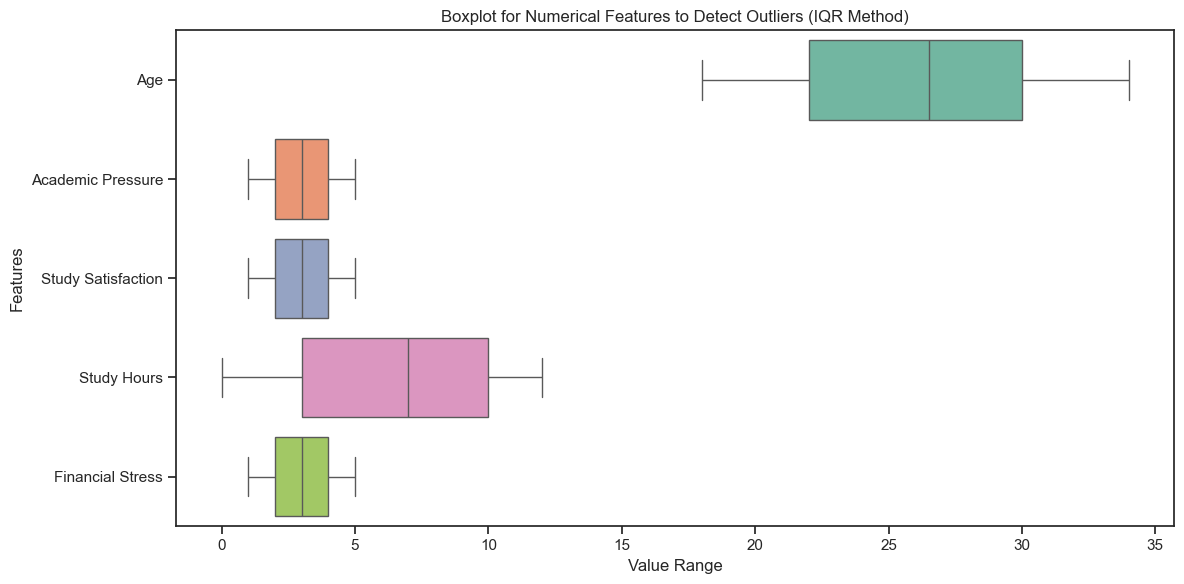

In [283]:
# Visualisasikan outlier menggunakan boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_columns], orient="h", palette="Set2")
plt.title("Boxplot for Numerical Features to Detect Outliers (IQR Method)")
plt.xlabel("Value Range")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


### **5. Melakukan Analisis Statistik Deskriptif**
Saya akan menghitung ukuran statistik utama seperti mean, median, mode, standar deviasi, dan persentil untuk kolom-kolom numerik yang penting.<br>
Menghitung statistik dasar untuk mendapatkan gambaran umum tentang data:
- **Mean (Rata-rata)**: Nilai rata-rata dari data.
- **Median**: Nilai tengah dari data.
- **Mode (Modus)**: Nilai yang paling sering muncul.
- **Standar Deviasi**: Untuk melihat variasi atau penyebaran data.
- **Min dan Max**: Nilai minimum dan maksimum dalam data.
- **Persentil dan Kuartil**: Pembagian data ke dalam bagian yang lebih kecil.


In [284]:
# Memilih kolom numerik untuk analisis statistik
numerical_columns = ['Age', 'Academic Pressure', 'Study Satisfaction', 
                     'Study Hours', 'Financial Stress']

# Statistik deskriptif: mean, median, std, dll.
statistics = data[numerical_columns].describe(percentiles=[0.25, 0.5, 0.75]).T

# Menghitung mode untuk setiap kolom numerik
mode_values = data[numerical_columns].mode().iloc[0]

# Menambahkan nilai mode ke statistik
statistics['mode'] = mode_values

# Menampilkan statistik
statistics


,count,mean,std,min,25%,50%,75%,max,mode
Age,502.0,26.241036,4.896501,18.0,22.0,26.5,30.0,34.0,28.0
Academic Pressure,502.0,3.003984,1.390007,1.0,2.0,3.0,4.0,5.0,3.0
Study Satisfaction,502.0,3.075697,1.373490,1.0,2.0,3.0,4.0,5.0,4.0
Study Hours,502.0,6.404382,3.742434,0.0,3.0,7.0,10.0,12.0,10.0
Financial Stress,502.0,2.928287,1.425053,1.0,2.0,3.0,4.0,5.0,1.0


Berikut adalah kesimpulan yang dapat diambil berdasarkan hasil analisis statistik deskriptif diatas:

1. **Usia (Age)**:
   - Rata-rata usia mahasiswa adalah **26 tahun**, dengan rentang usia dari **18 tahun** hingga **34 tahun**.
   - Sebagian besar mahasiswa berusia sekitar **28 tahun** (mode).
   - Distribusi usia cukup tersebar, terlihat dari standar deviasi sebesar **4.89**, menunjukkan variasi usia mahasiswa.

2. **Tekanan Akademik (Academic Pressure)**:
   - Rata-rata tekanan akademik berada di angka **3.00** (skala 1–5), menunjukkan tingkat tekanan yang moderat.
   - Mode di angka **3** mengindikasikan bahwa mayoritas mahasiswa merasakan tingkat tekanan akademik pada level ini.
   - Tekanan akademik minimum adalah **1**, sedangkan maksimum mencapai **5**, yang menunjukkan beberapa mahasiswa mengalami tekanan yang sangat tinggi.

3. **Kepuasan Belajar (Study Satisfaction)**:
   - Rata-rata kepuasan belajar mahasiswa adalah **3.08**, dengan mode sebesar **4**, menunjukkan sebagian besar mahasiswa merasa cukup puas dengan aktivitas belajarnya.
   - Standar deviasi sebesar **1.37** menunjukkan variasi moderat dalam tingkat kepuasan belajar.

4. **Jam Belajar (Study Hours)**:
   - Rata-rata jam belajar mahasiswa adalah **6.40 jam per hari**, dengan distribusi yang cukup luas, dari **0 jam** hingga **12 jam per hari**.
   - Mode berada di angka **10**, menunjukkan bahwa beberapa mahasiswa belajar selama 10 jam per hari, yang tergolong tinggi.
   - Standar deviasi **3.74** menunjukkan perbedaan besar antar mahasiswa dalam alokasi waktu belajar.

5. **Stres Finansial (Financial Stress)**:
   - Rata-rata tingkat stres finansial berada di angka **2.93**, menunjukkan tingkat moderat, dengan mode di angka **1**, yang berarti sebagian besar mahasiswa melaporkan tingkat stres finansial yang rendah.
   - Rentang stres finansial adalah dari **1** (minimum) hingga **5** (maksimum), menunjukkan adanya mahasiswa dengan tingkat stres yang sangat tinggi.

### **6. Visualisasi Data**


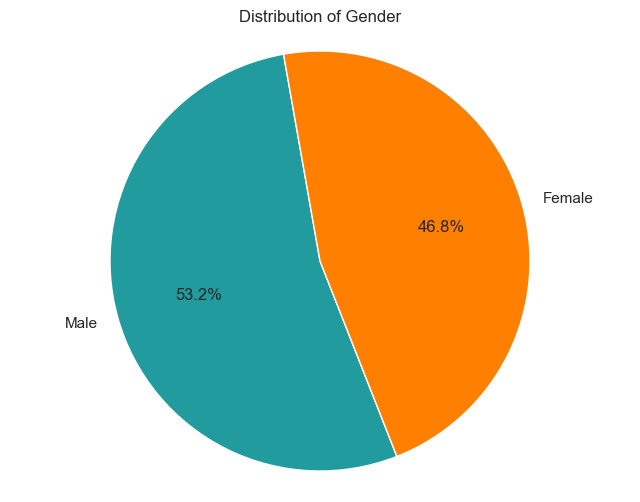

In [301]:
# Membuat pie chart untuk kolom Gender
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#219B9D', '#FF8000'], startangle=100)
plt.title('Distribution of Gender')
plt.axis('equal')
plt.show()

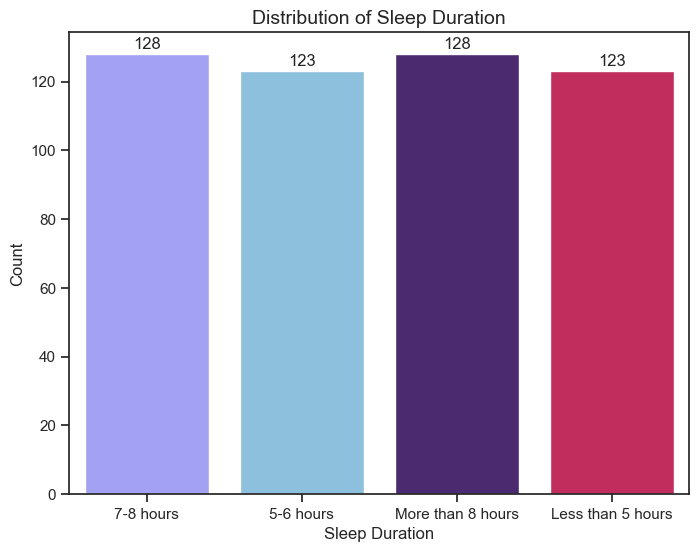

In [286]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=data,
    x='Sleep Duration',
    palette={'7-8 hours':'#9694FF', 
             '5-6 hours':'#80C4E9', 
             'More than 8 hours':'#4C1F7A', 
             'Less than 5 hours':'#D91656'}
)

for container in plt.gca().containers:
    plt.bar_label(container, label_type="edge", padding=2)

plt.title('Distribution of Sleep Duration', fontsize=14)
plt.xlabel('Sleep Duration', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

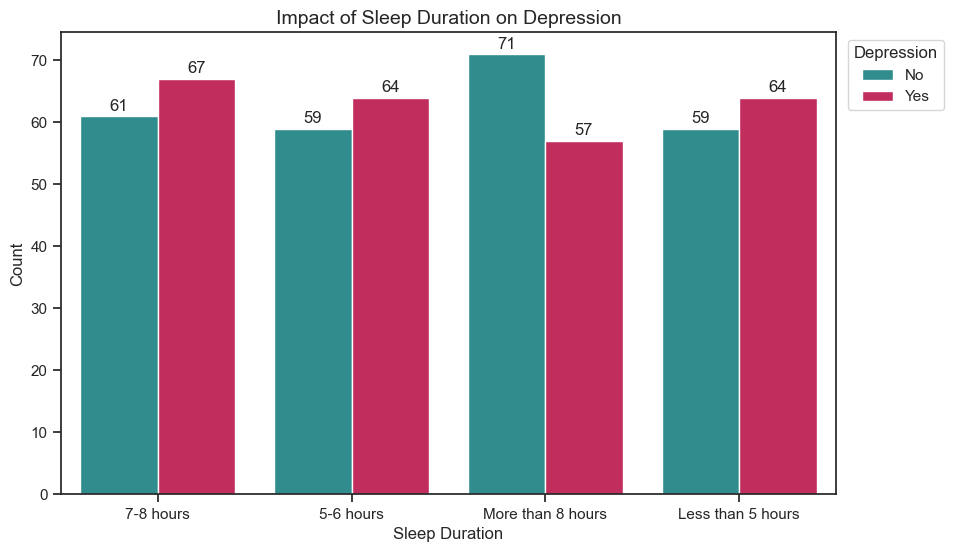

In [287]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=data,
    x='Sleep Duration',
    hue='Depression',
    palette={'Yes': '#D91656', 'No': '#219B9D'}
)

# Menambahkan label pada setiap batang
for container in plt.gca().containers:
    plt.bar_label(container, label_type="edge", padding=2)

plt.title('Impact of Sleep Duration on Depression', fontsize=14)
plt.xlabel('Sleep Duration', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Depression', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

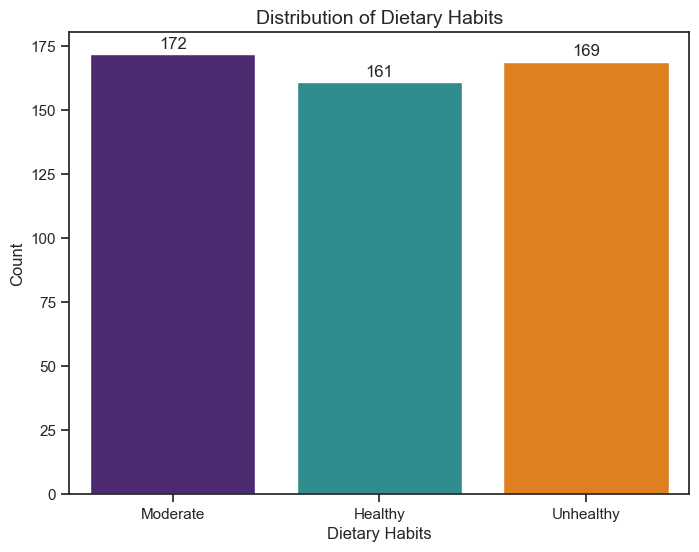

In [288]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=data,
    x='Dietary Habits',
    palette={'Healthy': '#219B9D', 'Unhealthy': '#FF8000', 'Moderate': '#4C1F7A'}
)

for container in plt.gca().containers:
    plt.bar_label(container, label_type="edge", padding=2)

plt.title('Distribution of Dietary Habits', fontsize=14)
plt.xlabel('Dietary Habits', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

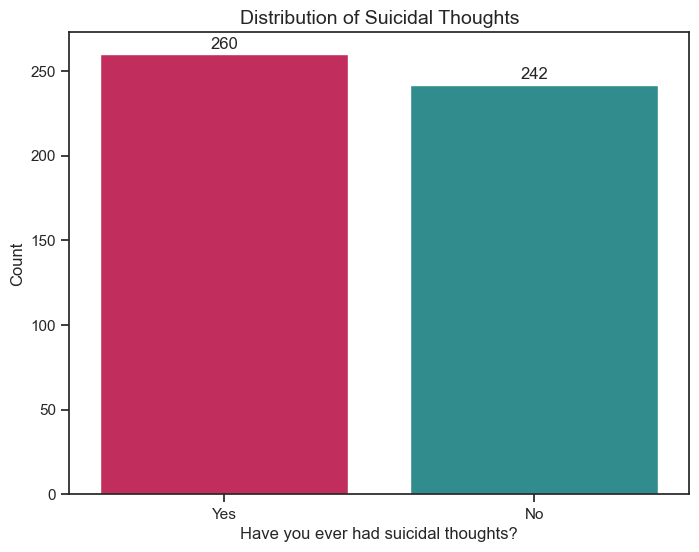

In [289]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=data,
    x='Have you ever had suicidal thoughts ?',
    palette={'Yes': '#D91656', 'No': '#219B9D'}
)

for container in plt.gca().containers:
    plt.bar_label(container, label_type="edge", padding=2)

plt.title('Distribution of Suicidal Thoughts', fontsize=14)
plt.xlabel('Have you ever had suicidal thoughts?', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

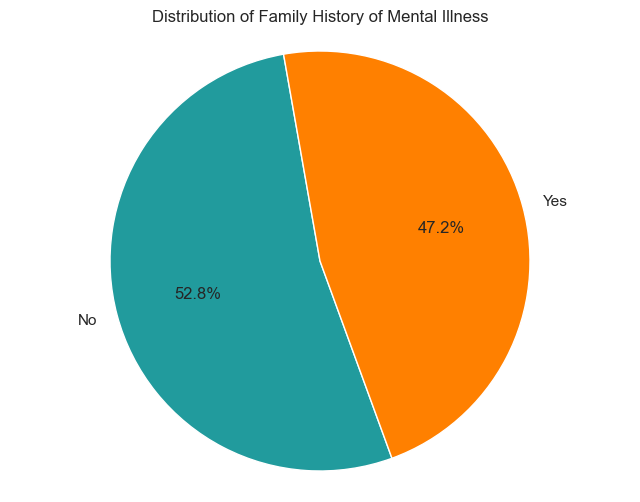

In [310]:
# Membuat pie chart untuk kolom Family History of Mental Illness
family_history_counts = data['Family History of Mental Illness'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(family_history_counts, labels=family_history_counts.index, autopct='%1.1f%%', colors=['#219B9D', '#FF8000'], startangle=100)
plt.title('Distribution of Family History of Mental Illness')
plt.axis('equal')
plt.show()

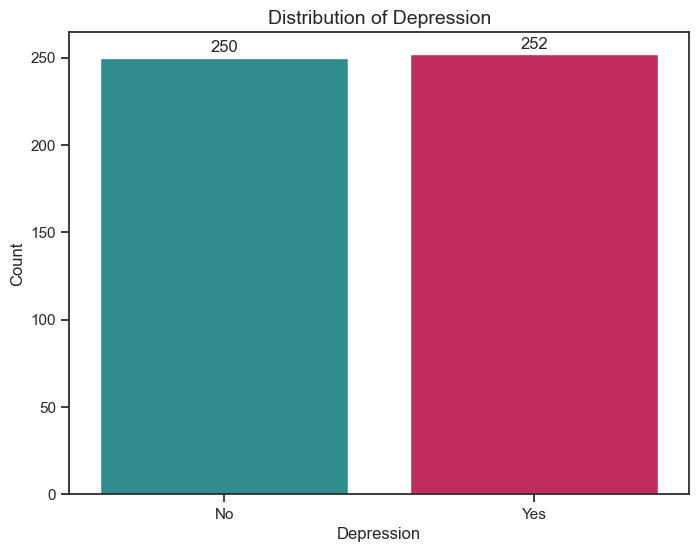

In [291]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=data,
    x='Depression',
    palette={'Yes': '#D91656', 'No': '#219B9D'}
)

for container in plt.gca().containers:
    plt.bar_label(container, label_type="edge", padding=2)

plt.title('Distribution of Depression', fontsize=14)
plt.xlabel('Depression', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

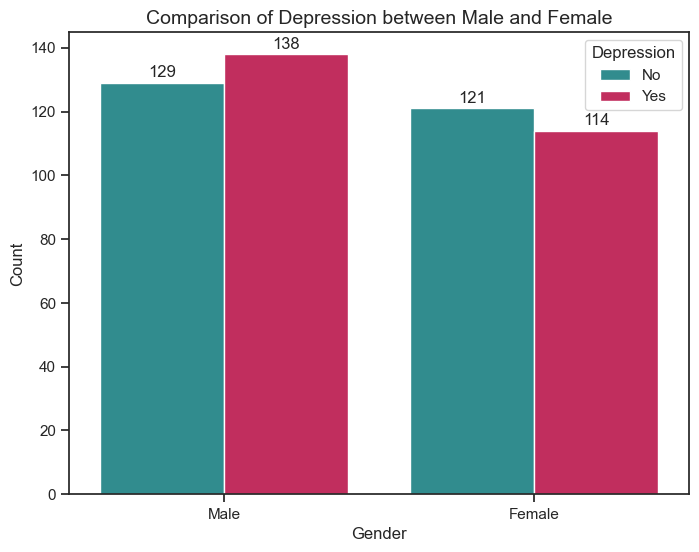

In [292]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=data,
    x='Gender',
    hue='Depression',
    palette={'Yes': '#D91656', 'No': '#219B9D'}
)

# Menambahkan label pada setiap batang
for container in plt.gca().containers:
    plt.bar_label(container, label_type="edge", padding=2)

plt.title('Comparison of Depression between Male and Female', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Depression', loc='upper right')
plt.show()

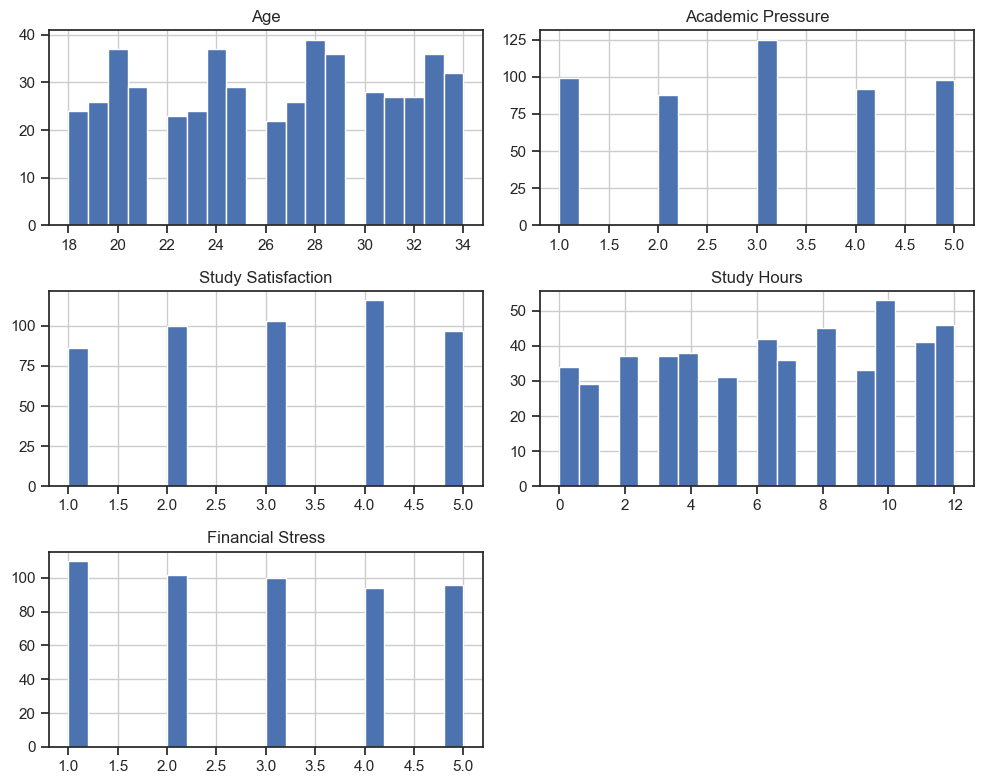

In [293]:
numerical_columns = ['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours', 'Financial Stress']
data[numerical_columns].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

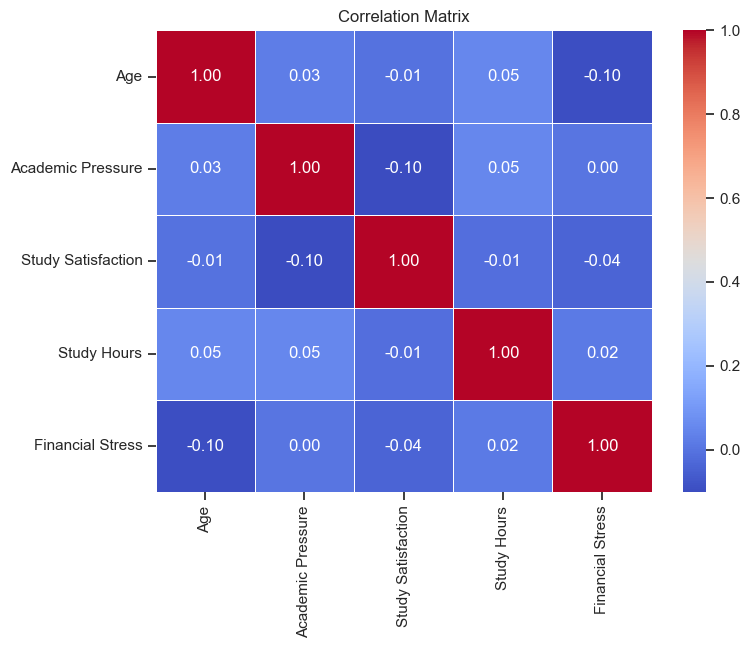

In [294]:
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

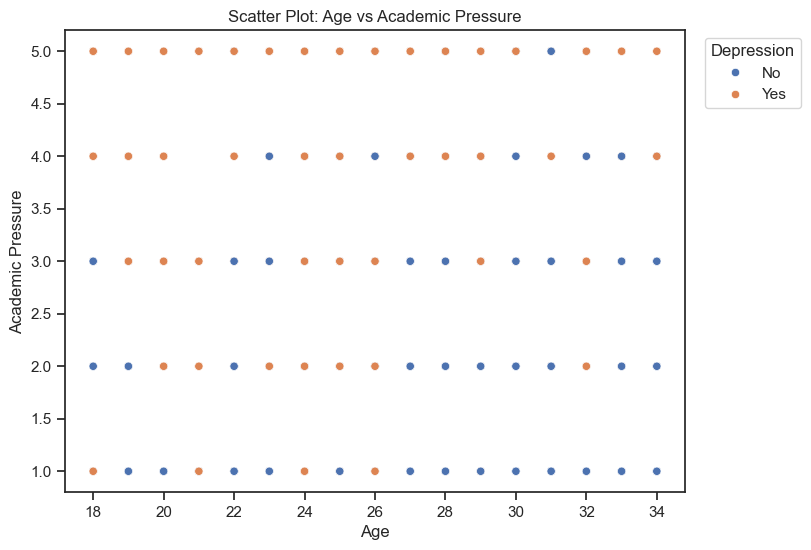

In [295]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Academic Pressure', hue='Depression')
plt.title("Scatter Plot: Age vs Academic Pressure")
plt.legend(title='Depression', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

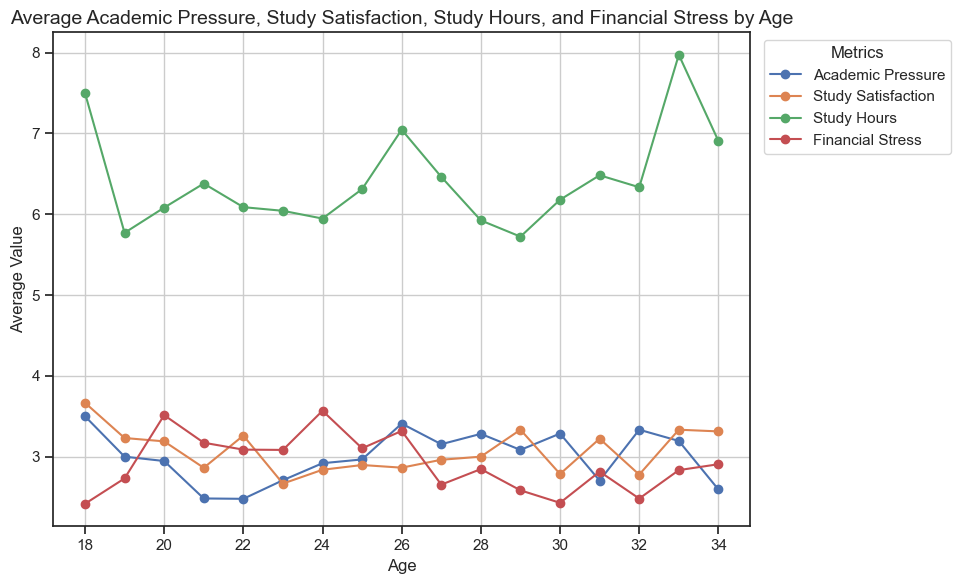

In [305]:
# Menghitung rata-rata untuk setiap kolom numerik berdasarkan usia
age_grouped = data.groupby('Age')[['Academic Pressure', 'Study Satisfaction', 'Study Hours', 'Financial Stress']].mean()

# Membuat line chart
plt.figure(figsize=(10, 6))
for column in age_grouped.columns:
    plt.plot(age_grouped.index, age_grouped[column], marker='o', label=column)

plt.title('Average Academic Pressure, Study Satisfaction, Study Hours, and Financial Stress by Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend(title='Metrics', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.tight_layout()
plt.show()